# Diplomatura en ciencia de datos, aprendizaje automático y sus aplicaciones - Edición 2023 - FAMAF (UNC)

## Procesamiento digital de imágenes

### Trabajo práctico entregable

**Estudiante:**
- [Chevallier-Boutell, Ignacio José.](https://www.linkedin.com/in/nachocheva/)

**Docentes:**
- Delrieux, Claudio (LCI, UNS-CONICET).
- Bajo, Juan Miguel (ICIC, UNS-CONICET).

---

## Librerías

In [1]:
import imageio.v3 as iio
import numpy as np
import matplotlib.pyplot as plt

## Imagen a usar

Se utilizará la siguiente imagen, extraída de la documentación de imageio.

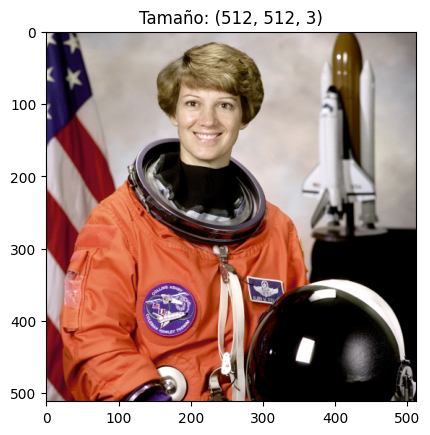

In [2]:
# Image of a cup of coffee (Rachel Michetti)
# cafe = iio.imread('imageio:coffee.png')
# cafe = iio.imread('imageio:bricks.jpg')
cafe = iio.imread('imageio:astronaut.png')

fig, axs = plt.subplots()
axs.imshow(cafe)
axs.set_title(f'Tamaño: {cafe.shape}')
plt.show()

---
# Ejercicio 1

## Ejercicio 1.1
La propuesta para esta actividad consiste en manipular independientemente la luminancia y la saturación de una imagen.
Para ello convertimos cada pixel de la imagen del espacio RGB al espacio YIQ, luego alteramos los valores de Y (para cambiar la luminancia) o de IQ (para cambiar la saturación).
Con los nuevos valores de YIQ, convertimos a RGB nuevamente y obtenemos una nueva imagen.

### Funciones necesarias

#### Cambio de base

In [3]:
# Matriz de cambio de base: de RGB a YIQ 
RGB2YIQ = np.array([[0.299,     0.587,     0.114],
                    [0.595716, -0.274453, -0.321263],
                    [0.211456, -0.522591,  0.311135]])

# Matriz de cambio de base: de YIQ a RGB 
YIQ2RGB = np.array([[1,  0.9663,  0.6210],
                    [1, -0.2721, -0.6474],
                    [1, -1.1070,  1.7046]])

def rot_base(img, M):
    return np.matmul( img.reshape((-1,3)), M.T ).reshape(img.shape)

#### Variación de luminancia y cromaticidad

In [4]:
def change_lumcrom(img, alpha=1, beta=1):
    '''
    Dada una imagen img, permite modificar la luminancia según alpha y la 
    cromaticidad según beta.
    '''

    if (alpha == 1) & (beta == 1):
        print('No se hacen modificaciones.')
        print('Se devuelve una imagen negra por defecto')

        return np.zeros(img.shape)

    else:
        # Normalizamos los valores de RGB
        img_norm  = img / 255

        # Nos vamos a YIQ
        img_YIQ = rot_base(img_norm, RGB2YIQ)

        if alpha != 1:
            # Modificamos la luminancia según alfa
            img_YIQ[:,:,0] = np.clip(img_YIQ[:,:,0] * alpha, 0 , 1)

        if beta != 1:
            # Modificamos la cromaticidad según beta en I
            img_YIQ[:,:,1] = np.clip(img_YIQ[:,:,1] * beta, -0.5957, 0.5957)

            # Modificamos la cromaticidad según beta en Q
            img_YIQ[:,:,2] = np.clip(img_YIQ[:,:,2] * beta, -0.5226, 0.5226)

        # Volvemos a RGB
        img_RGB = np.clip(rot_base(img_YIQ, YIQ2RGB), 0, 1)

        # Pasamos a 8-bit (enteros)
        img_RGB *= 255
        img_RGB = img_RGB.astype(int)

        return img_RGB

### Efectos sobre la foto del café

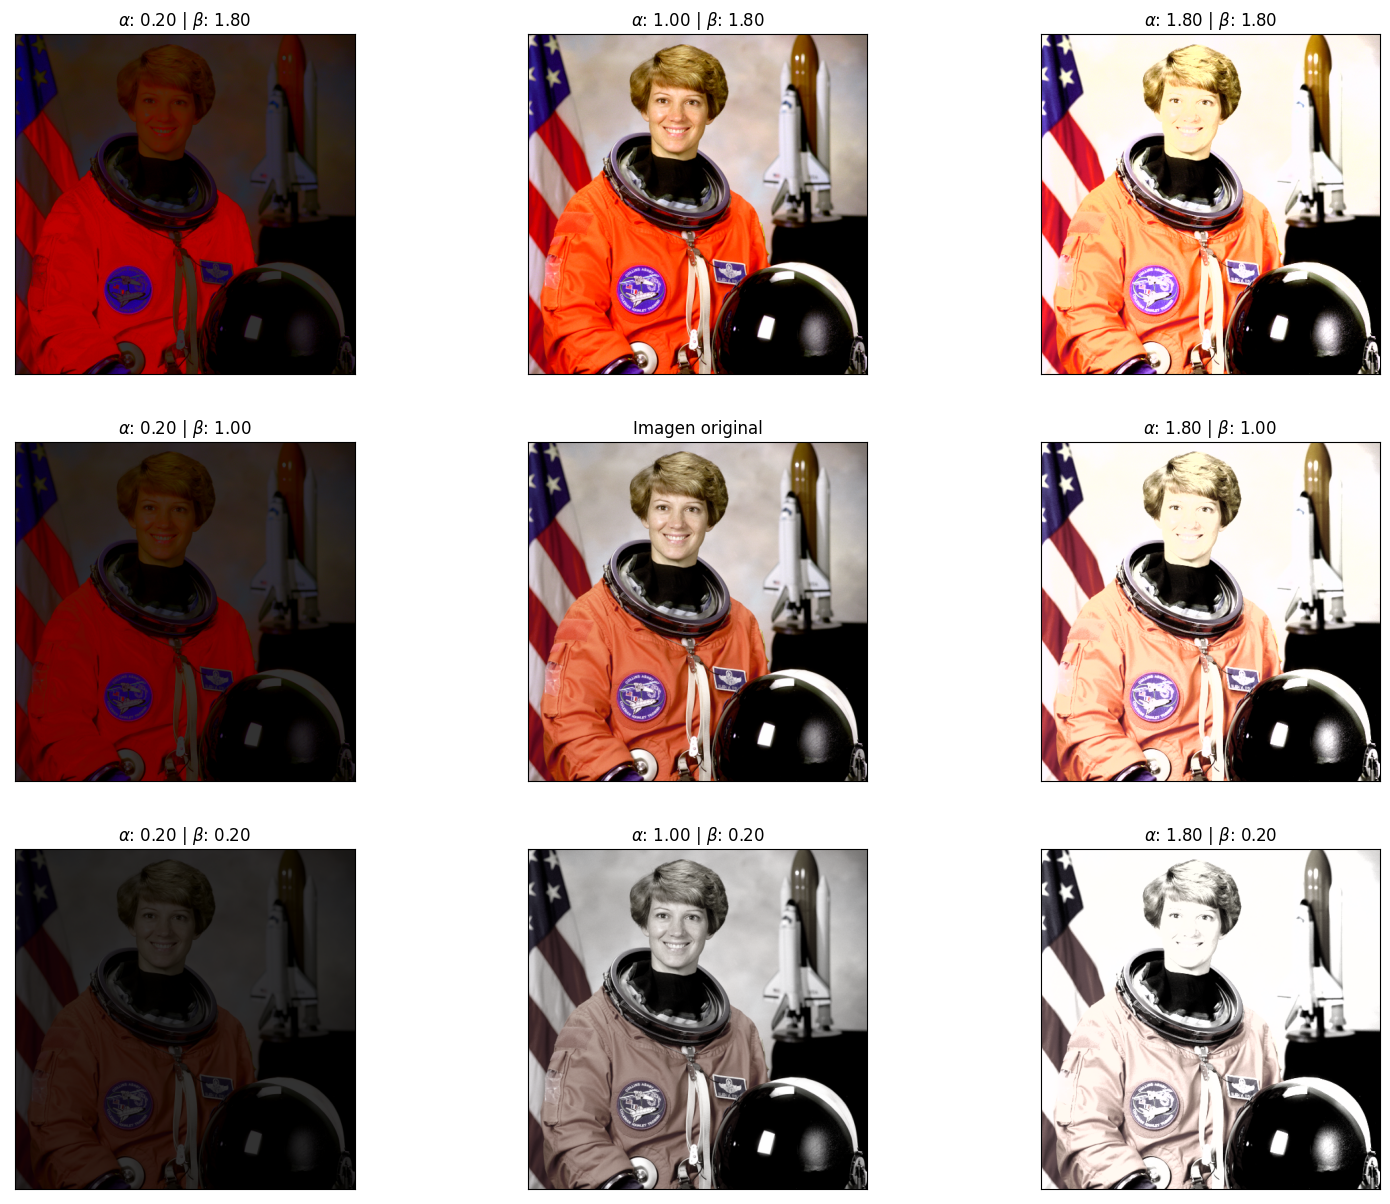

In [5]:
_, axs = plt.subplots(3, 3, figsize=(18.75, 15))

axs[0, 0].set_title(r'$\alpha$: 0.20 | $\beta$: 1.80')
axs[0, 0].imshow(change_lumcrom(cafe, 0.20, 1.80))

axs[0, 1].set_title(r'$\alpha$: 1.00 | $\beta$: 1.80')
axs[0, 1].imshow(change_lumcrom(cafe, 1.00, 1.80))

axs[0, 2].set_title(r'$\alpha$: 1.80 | $\beta$: 1.80')
axs[0, 2].imshow(change_lumcrom(cafe, 1.80, 1.80))

axs[1, 0].set_title(r'$\alpha$: 0.20 | $\beta$: 1.00')
axs[1, 0].imshow(change_lumcrom(cafe, 0.20, 1.00))

axs[1, 1].set_title('Imagen original')
axs[1, 1].imshow(cafe)

axs[1, 2].set_title(r'$\alpha$: 1.80 | $\beta$: 1.00')
axs[1, 2].imshow(change_lumcrom(cafe, 1.80, 1.00))

axs[2, 0].set_title(r'$\alpha$: 0.20 | $\beta$: 0.20')
axs[2, 0].imshow(change_lumcrom(cafe, 0.20, 0.20))

axs[2, 1].set_title(r'$\alpha$: 1.00 | $\beta$: 0.20')
axs[2, 1].imshow(change_lumcrom(cafe, 1.00, 0.20))

axs[2, 2].set_title(r'$\alpha$: 1.80 | $\beta$: 0.20')
axs[2, 2].imshow(change_lumcrom(cafe, 1.80, 0.20))

for r in range(3):
    for c in range(3):
        axs[r, c].set_xticks([])
        axs[r, c].set_yticks([])

plt.show()

## Ejercicio 1.2
Desarrollar un aplicafeivo o notebook que pueda abrir una imagen, manipule su histograma de luminancias, y luego ver la imagen procesada. Se debe poder elegir filtro raíz, cuadrado, o lineal a trozos.
Los controles para elegir los filtros los organizan como les resulte más cómodo.

### Funciones necesarias

In [6]:
def gamma_corr(img, gamma):
    '''
    Aplica una corrección gamma según sobre las luminancias de la imagen img, 
    i.e. permite manipular el histograma según una ley de potencias, donde 
    gamma toma valores reales positivos.
    '''

    nBin = np.linspace(0, 1, 50)

    # Normalizamos los valores de RGB
    img_norm  = img / 255

    # Nos vamos a YIQ
    img_YIQ = rot_base(img_norm, RGB2YIQ)

    # Modificamos la luminancia según gamma
    img_YIQ[:,:,0] = np.clip(img_YIQ[:,:,0] ** gamma, 0 , 1)

    # Volvemos a RGB
    img_RGB = np.clip(rot_base(img_YIQ, YIQ2RGB), 0, 1)

    # Pasamos a 8-bit (enteros)
    img_RGB *= 255
    img_RGB = img_RGB.astype(int)

    return img_RGB

In [7]:
def partes_corr(img, m, M):
    '''
    Modifica el histogramas de luminancias de la imagen img mediante una 
    función lineal por partes.

    Dadas la mínima (m) y la máxima (M) luminancias deseadas:
        * Lleva a cero a toda luminancia menor a m.
        * Lleva a uno a toda luminancia mayor a M.
        * Mapea los valores intermedios según una función lineal.
    '''

    nBin = np.linspace(0, 1, 50)
    Delta = M - m

    # Normalizamos los valores de RGB
    img_norm  = img / 255

    # Nos vamos a YIQ
    img_YIQ = rot_base(img_norm, RGB2YIQ)

    # Modificamos la luminancia según m y M
    img_YIQ[:,:,0][img_YIQ[:,:,0] < m] = 0
    img_YIQ[:,:,0][img_YIQ[:,:,0] > M] = 1
    img_YIQ[:,:,0][(img_YIQ[:,:,0] >= m) & (img_YIQ[:,:,0] <= M)] = (img_YIQ[:,:,0][(img_YIQ[:,:,0] >= m) & (img_YIQ[:,:,0] <= M)] - m) / Delta

    # Volvemos a RGB
    img_RGB = np.clip(rot_base(img_YIQ, YIQ2RGB), 0, 1)

    # Pasamos a 8-bit (enteros)
    img_RGB *= 255
    img_RGB = img_RGB.astype(int)

    return img_RGB

### Efectos sobre la foto del café

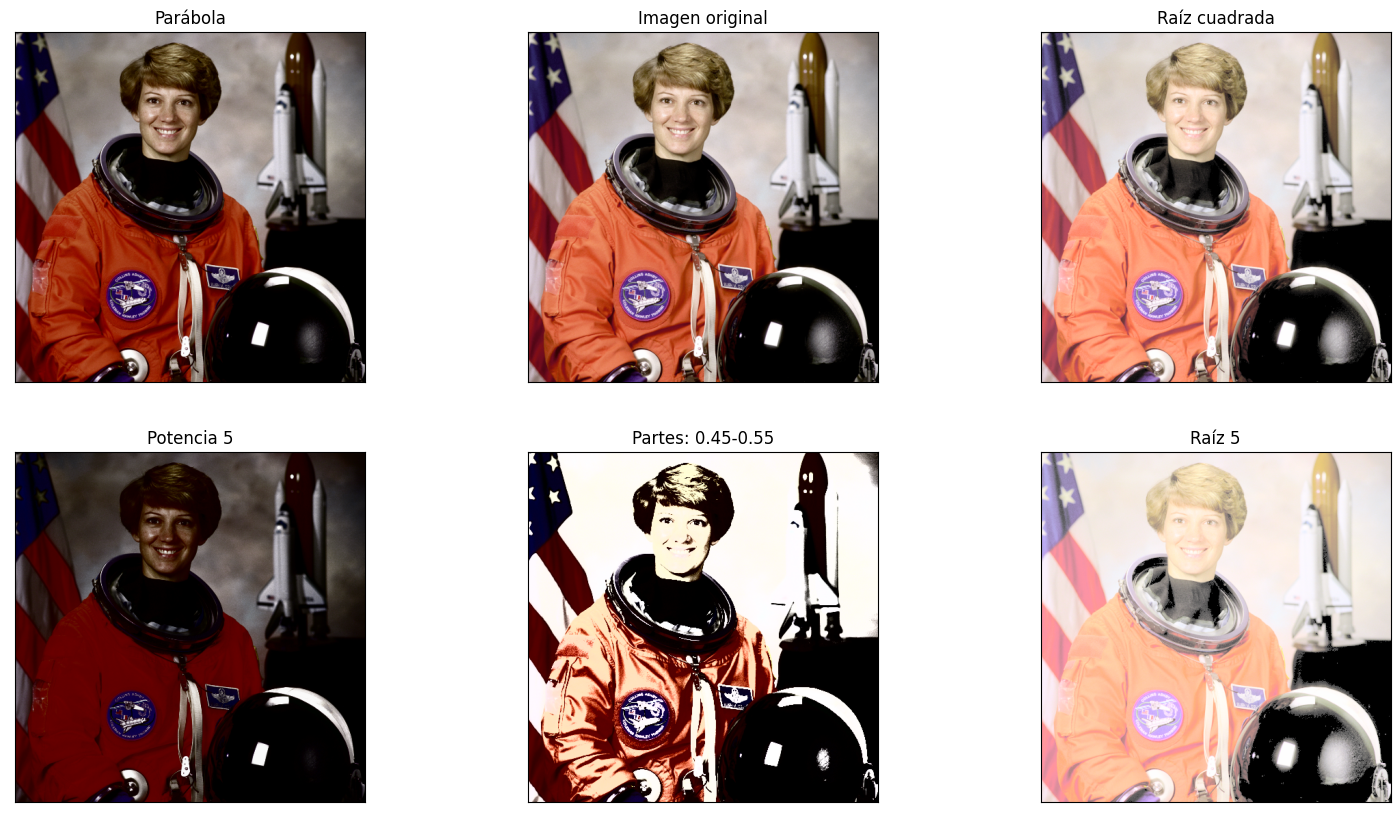

In [8]:
_, axs = plt.subplots(2, 3, figsize=(18.75, 10))

axs[0, 0].set_title('Parábola')
axs[0, 0].imshow(gamma_corr(cafe, 2))

axs[0, 1].set_title('Imagen original')
axs[0, 1].imshow(cafe)

axs[0, 2].set_title('Raíz cuadrada')
axs[0, 2].imshow(gamma_corr(cafe, 1/2))

axs[1, 0].set_title('Potencia 5')
axs[1, 0].imshow(gamma_corr(cafe, 5))

axs[1, 1].set_title('Partes: 0.45-0.55')
axs[1, 1].imshow(partes_corr(cafe, 0.45, 0.55))

axs[1, 2].set_title('Raíz 5')
axs[1, 2].imshow(gamma_corr(cafe, 1/5))

for r in range(2):
    for c in range(3):
        axs[r, c].set_xticks([])
        axs[r, c].set_yticks([])

plt.show()

---
# Ejercicio 2

## Ejercicio 2.1
Implementar un aplicafeivo o notebook que levante una imagen en nivel de gris (o que la convierta a YIQ y retenga solo el Y) y aplique el filtrado por convolución aquí visto:
1. Pasabajos: Plano, Bartlett 3x3, Gaussiano 5x5.
2. Detectores de bordes: Laplaciano v4, Sobel 4 orientaciones.
3. Pasabanda.

Respecto del “cierre” de la imagen cerca de los bordes, implementar la técnica no ma- temáticamente perfecta de “repetir” artificialmente filas o columnas cuando estas hagan falta. Por ejemplo, si el kernel es 3x3 y estoy en la primera columna, y no hay ninguna columna a la izquierda, entonces repito la primera columna como si estuviese en la imagen original.

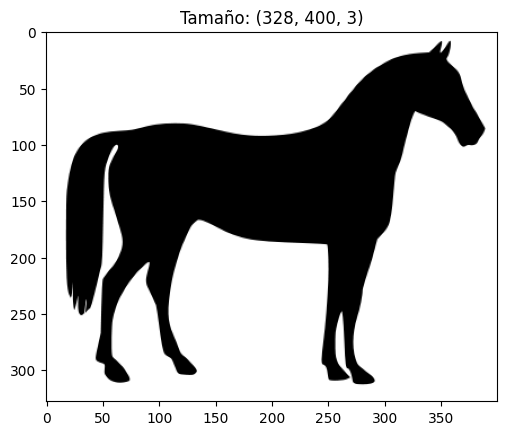

In [18]:
cafe = iio.imread('imageio:horse.png')

cafe = cafe[:, :, :3]

fig, axs = plt.subplots()
axs.imshow(cafe)
axs.set_title(f'Tamaño: {cafe.shape}')
plt.show()

### Funciones de filtrado

In [19]:
def filter3(img, Kernel):
    '''
    Filtra la imagen img tomando la máscara Kernel de 3x3.
    '''

    # Tenemos la imagen RGB completa
    if img.ndim == 3:
        # Normalizamos los valores de RGB
        img_norm  = img / 255

        # Nos vamos a YIQ
        img_YIQ = rot_base(img_norm, RGB2YIQ)
        chanY = img_YIQ[:,:,0]

    # Partimos de una imagen monocanal (Y)
    else:
        chanY = img

    # Generamos borde ficticio
    padd = chanY.copy()

    top = padd[0,:]
    bottom = padd[-1,:]
    padd = np.vstack([top, padd, bottom])

    left = np.reshape(padd[:,0], (len(padd[:,0]), 1))
    right = np.reshape(padd[:,-1], (len(padd[:,-1]), 1))
    padd = np.hstack([left, padd, right])

    # Aplicamos el filtro
    row, col = chanY.shape
    for r in range(row):
        for c in range(col):
            env = padd[r:r+3, c:c+3]
            chanY[r,c] = np.sum(env * Kernel)

    # Normalizamos el Kernel utilizado cuando usamos un pasabajos
    normKer = int(np.sum(Kernel))
    if normKer != 0:
        chanY *= 1/normKer

    return chanY

In [20]:
def filter5(img, Kernel):
    '''
    Filtra la imagen img tomando la máscara Kernel de 5x5.
    '''

    # Tenemos la imagen RGB completa
    if img.ndim == 3:
        # Normalizamos los valores de RGB
        img_norm  = img / 255

        # Nos vamos a YIQ
        img_YIQ = rot_base(img_norm, RGB2YIQ)
        chanY = img_YIQ[:,:,0]

    # Partimos de una imagen monocanal (Y)
    else:
        chanY = img

    # Generamos borde ficticio
    padd = chanY.copy()

    top = padd[0,:]
    bottom = padd[-1,:]
    padd = np.vstack([top, top, padd, bottom, bottom])

    left = np.reshape(padd[:,0], (len(padd[:,0]), 1))
    right = np.reshape(padd[:,-1], (len(padd[:,-1]), 1))
    padd = np.hstack([left, left, padd, right, right])

    # Aplicamos el filtro
    row, col = chanY.shape
    for r in range(row):
        for c in range(col):
            env = padd[r:r+5, c:c+5]
            chanY[r,c] = np.sum(env * Kernel)

    # Normalizamos el Kernel utilizado cuando usamos un pasabajos
    normKer = int(np.sum(Kernel))
    if normKer != 0:
        chanY *= 1/normKer

    return chanY

### Máscaras

#### Pasabajos

In [21]:
# Filtro plano 3x3
Ker_plano = np.ones((3,3))

# Filtro de Bartlett 3x3
Ker_Bart = np.array([[1, 2, 1],
                    [2, 4, 2],
                    [1, 2, 1]])

# Filtro Gaussiano 3x3
Pascal3 = np.array([1, 2, 1])
Ker_Gauss3 = np.outer(Pascal3, Pascal3)

# Filtro Gaussiano 5x5
Pascal5 = np.array([1, 4, 6, 4, 1])
Ker_Gauss5 = np.outer(Pascal5, Pascal5)

#### Pasaaltos

In [22]:
# Filtro Laplaciano vecino-4
Ker_Lap4 = np.array([[0, -1, 0], 
                     [-1, 4, -1],
                     [0, -1, 0]])

# # Filtros de Sobel
# Ker_SN = np.array([[1, 2, 1], 
#                    [0, 0, 0], 
#                    [-1, -2, -1]])

# Ker_OE = np.array([[-1, 0, 1], 
#                    [-2, 0, 2], 
#                    [-1, 0, 1]])

# Ker_SONE = np.array([[0, 1, 2], 
#                      [-1, 0, 1], 
#                      [-2, -1, 0]])

# Ker_NOSE = np.array([[-2, -1, 0], 
#                      [-1, 0, 1], 
#                      [0, 1, 2]])

# Filtros de Sobel
Ker_SN = np.array([[0, 1, 0], 
                   [0, 0, 0], 
                   [0, -1, 0]])

Ker_OE = np.array([[0, 0, 0], 
                   [-1, 0, 1], 
                   [0, 0, 0]])

Ker_SONE = np.array([[0, 0, 1], 
                     [0, 0, 0], 
                     [-1, 0, 0]])

Ker_NOSE = np.array([[-1, 0, 0], 
                     [0, 0, 0], 
                     [0, 0, 1]])

### Efectos sobre la foto del café

#### Pasabajos

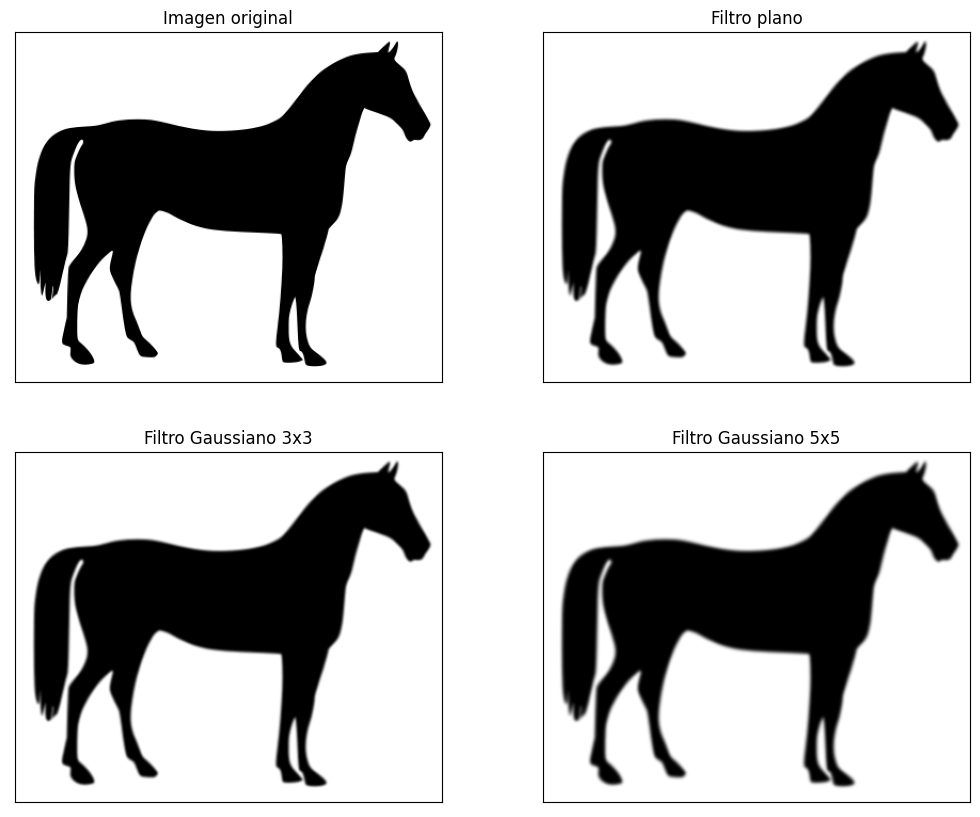

In [23]:
_, axs = plt.subplots(2, 2, figsize=(12.5, 10))

axs[0, 0].set_title('Imagen original')
axs[0, 0].imshow(cafe,"gray")

axs[0, 1].set_title('Filtro plano')
axs[0, 1].imshow(filter3(filter3(cafe, Ker_plano), Ker_plano),"gray")

axs[1, 0].set_title('Filtro Gaussiano 3x3')
axs[1, 0].imshow(filter3(filter3(cafe, Ker_Gauss3), Ker_Gauss3),"gray")

axs[1, 1].set_title('Filtro Gaussiano 5x5')
axs[1, 1].imshow(filter5(filter5(cafe, Ker_Gauss5), Ker_Gauss5),"gray")

for r in range(2):
    for c in range(2):
        axs[r, c].set_xticks([])
        axs[r, c].set_yticks([])

plt.show()

#### Pasaaltos

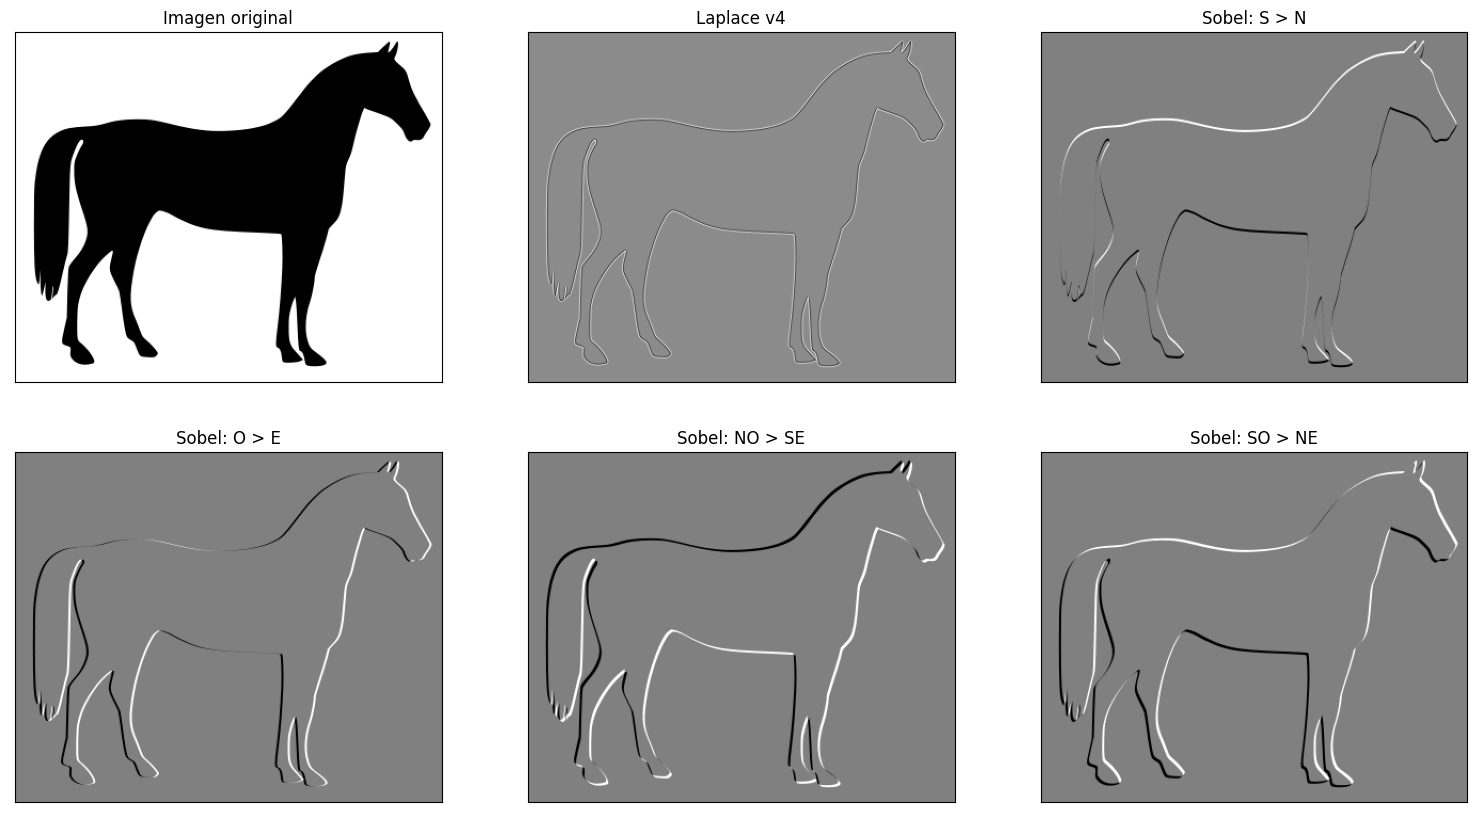

In [24]:
_, axs = plt.subplots(2, 3, figsize=(18.75, 10))

axs[0, 0].set_title('Imagen original')
axs[0, 0].imshow(cafe)

axs[0, 1].set_title('Laplace v4')
axs[0, 1].imshow(filter3(cafe, Ker_Lap4),"gray")

axs[0, 2].set_title('Sobel: S > N')
axs[0, 2].imshow(filter3(cafe, Ker_SN),"gray")

axs[1, 0].set_title('Sobel: O > E')
axs[1, 0].imshow(filter3(cafe, Ker_OE),"gray")

axs[1, 1].set_title('Sobel: NO > SE')
axs[1, 1].imshow(filter3(cafe, Ker_NOSE),"gray")

axs[1, 2].set_title('Sobel: SO > NE')
axs[1, 2].imshow(filter3(cafe, Ker_SONE),"gray")

for r in range(2):
    for c in range(3):
        axs[r, c].set_xticks([])
        axs[r, c].set_yticks([])

plt.show()

#### Pasabanda: DoG

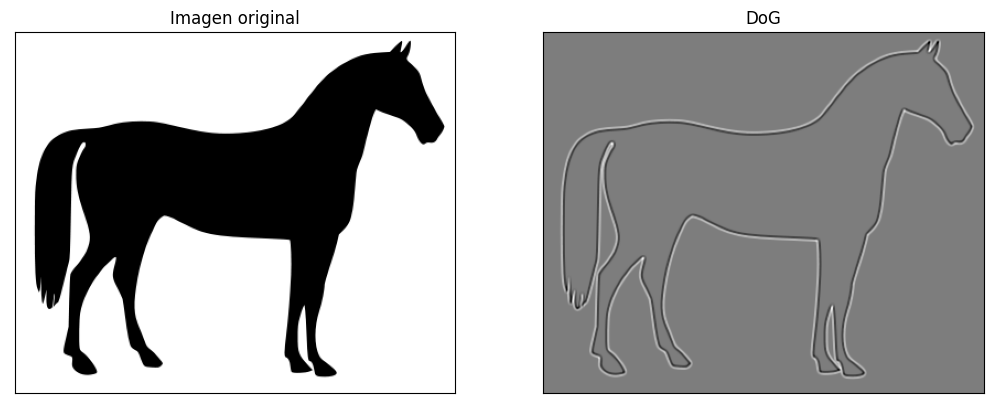

In [25]:
_, axs = plt.subplots(1, 2, figsize=(12.5, 5))

axs[0].set_title('Imagen original')
axs[0].imshow(cafe)

axs[1].set_title('DoG')
axs[1].imshow(filter3(cafe, Ker_Gauss3) - filter5(cafe, Ker_Gauss5),"gray")

for c in range(2):
    axs[c].set_xticks([])
    axs[c].set_yticks([])

plt.show()

## Ejercicio 2.2
Desarrollar un aplicativo o notebook que implemente los conceptos de morfología en niveles de gris aquí descriptos, con un elemento estructurante 3x3. El mismo incluirá las siguientes funciones:
- Erosión (tomar el mínimo valor de luminancia de la vecindad).
- Dilatación (máximo)
- Apertura, cierre, borde morfológico
- Mediana
- Top-hat

Incluir la capacidad de copiar la componente de la imagen procesada en la componente original, para poder aplicar dos o más filtrados en secuencia.

### Funciones morfológicas

In [26]:
def erosion(img):
    '''
    Erosiona la imagen img.
    '''

    # Tenemos la imagen RGB completa
    if img.ndim == 3:
        # Normalizamos los valores de RGB
        img_norm  = img / 255

        # Nos vamos a YIQ
        img_YIQ = rot_base(img_norm, RGB2YIQ)
        chanY = img_YIQ[:,:,0]

    # Partimos de una imagen monocanal (Y)
    else:
        chanY = img

    # Generamos borde ficticio
    padd = chanY.copy()

    top = padd[0,:]
    bottom = padd[-1,:]
    padd = np.vstack([top, padd, bottom])

    left = np.reshape(padd[:,0], (len(padd[:,0]), 1))
    right = np.reshape(padd[:,-1], (len(padd[:,-1]), 1))
    padd = np.hstack([left, padd, right])

    # Aplicamos el filtro
    row, col = chanY.shape
    for r in range(row):
        for c in range(col):
            env = padd[r:r+3, c:c+3]
            chanY[r,c] = np.min(env)

    return chanY

In [27]:
def dilatacion(img):
    '''
    Dilata la imagen img.
    '''

    # Tenemos la imagen RGB completa
    if img.ndim == 3:
        # Normalizamos los valores de RGB
        img_norm  = img / 255

        # Nos vamos a YIQ
        img_YIQ = rot_base(img_norm, RGB2YIQ)
        chanY = img_YIQ[:,:,0]

    # Partimos de una imagen monocanal (Y)
    else:
        chanY = img

    # Generamos borde ficticio
    padd = chanY.copy()

    top = padd[0,:]
    bottom = padd[-1,:]
    padd = np.vstack([top, padd, bottom])

    left = np.reshape(padd[:,0], (len(padd[:,0]), 1))
    right = np.reshape(padd[:,-1], (len(padd[:,-1]), 1))
    padd = np.hstack([left, padd, right])

    # Aplicamos el filtro
    row, col = chanY.shape
    for r in range(row):
        for c in range(col):
            env = padd[r:r+3, c:c+3]
            chanY[r,c] = np.max(env)

    return chanY

In [28]:
def fil_mediana(img):
    '''
    Aplica un filtro de mediana sobre la imagen img.
    '''

    # Tenemos la imagen RGB completa
    if img.ndim == 3:
        # Normalizamos los valores de RGB
        img_norm  = img / 255

        # Nos vamos a YIQ
        img_YIQ = rot_base(img_norm, RGB2YIQ)
        chanY = img_YIQ[:,:,0]

    # Partimos de una imagen monocanal (Y)
    else:
        chanY = img

    # Generamos borde ficticio
    padd = chanY.copy()

    top = padd[0,:]
    bottom = padd[-1,:]
    padd = np.vstack([top, padd, bottom])

    left = np.reshape(padd[:,0], (len(padd[:,0]), 1))
    right = np.reshape(padd[:,-1], (len(padd[:,-1]), 1))
    padd = np.hstack([left, padd, right])

    # Aplicamos el filtro
    row, col = chanY.shape
    for r in range(row):
        for c in range(col):
            env = padd[r:r+3, c:c+3]
            chanY[r,c] = np.median(env)

    return chanY

In [29]:
def borde_ext(img):
    # Tenemos la imagen RGB completa
    if img.ndim == 3:
        # Normalizamos los valores de RGB
        img_norm  = img / 255

        # Nos vamos a YIQ
        img_YIQ = rot_base(img_norm, RGB2YIQ)
        chanY = img_YIQ[:,:,0]

    # Partimos de una imagen monocanal (Y)
    else:
        chanY = img

    return dilatacion(img) - chanY

def borde_int(img):
    # Tenemos la imagen RGB completa
    if img.ndim == 3:
        # Normalizamos los valores de RGB
        img_norm  = img / 255

        # Nos vamos a YIQ
        img_YIQ = rot_base(img_norm, RGB2YIQ)
        chanY = img_YIQ[:,:,0]

    # Partimos de una imagen monocanal (Y)
    else:
        chanY = img

    return chanY - erosion(img)

In [30]:
def apertura(img):
    return dilatacion(erosion(img))

def cierre(img):
    return erosion(dilatacion(img))

In [31]:
def top_hat(img):
    # Tenemos la imagen RGB completa
    if img.ndim == 3:
        # Normalizamos los valores de RGB
        img_norm  = img / 255

        # Nos vamos a YIQ
        img_YIQ = rot_base(img_norm, RGB2YIQ)
        chanY = img_YIQ[:,:,0]

    # Partimos de una imagen monocanal (Y)
    else:
        chanY = img

    return chanY - apertura(img)

### Efectos sobre la foto del café

#### Erosión, dilatación, filtro de mediana y borde morfológico

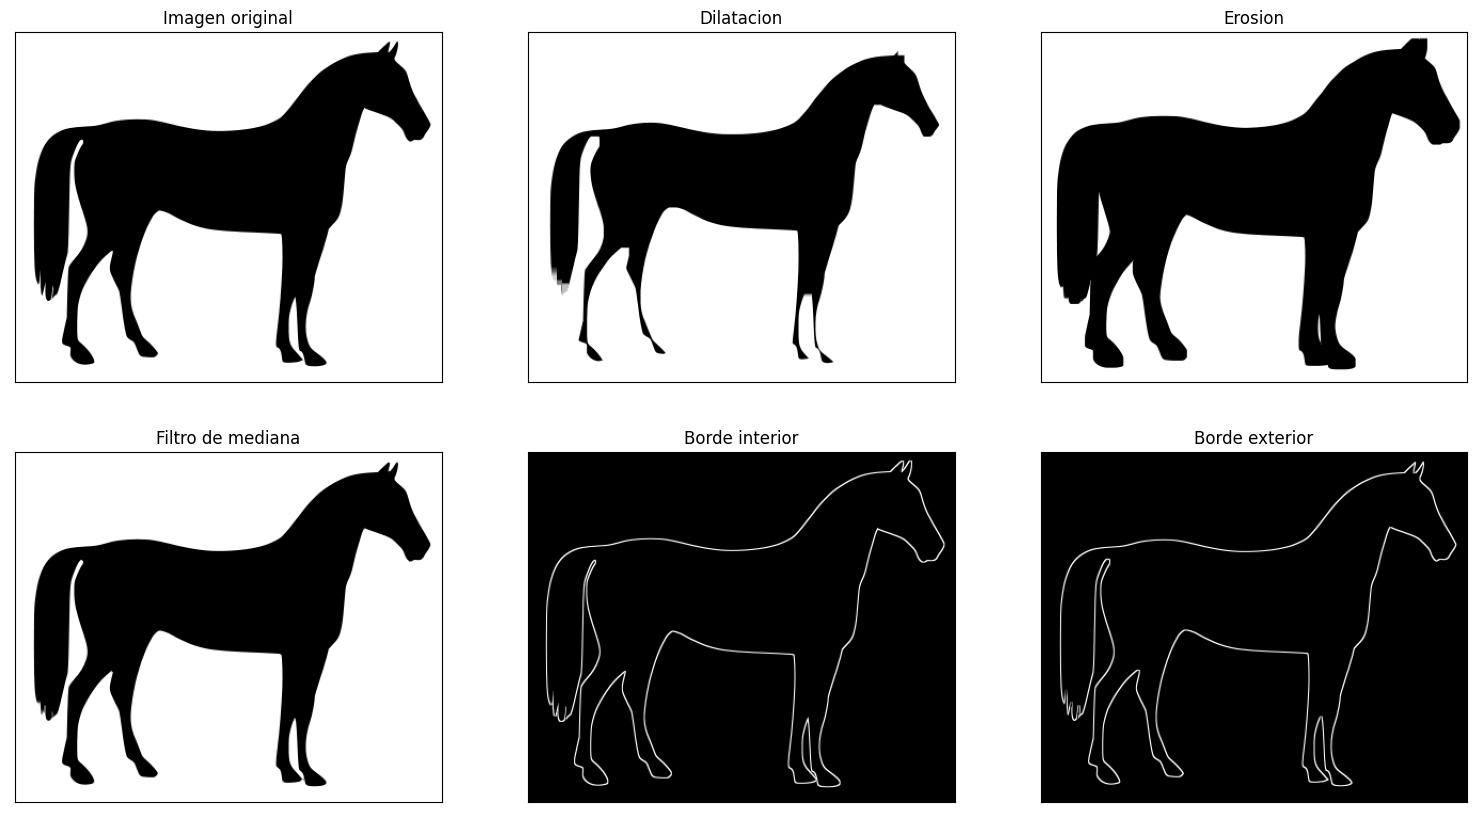

In [32]:
_, axs = plt.subplots(2, 3, figsize=(18.75, 10))

axs[0, 0].set_title('Imagen original')
axs[0, 0].imshow(cafe)

axs[0, 1].set_title('Dilatacion')
axs[0, 1].imshow(dilatacion(dilatacion(dilatacion(cafe))),"gray")

axs[0, 2].set_title('Erosion')
axs[0, 2].imshow(erosion(erosion(erosion(cafe))),"gray")

# se probo iterando 20 veces y no hay cambios
axs[1, 0].set_title('Filtro de mediana')
axs[1, 0].imshow(fil_mediana(cafe),"gray")

# estas dos no tiene sentido repetirlas. Se va a negro
axs[1, 1].set_title('Borde interior')
axs[1, 1].imshow(borde_int(cafe),"gray")

axs[1, 2].set_title('Borde exterior')
axs[1, 2].imshow(borde_ext(cafe),"gray")

for r in range(2):
    for c in range(3):
        axs[r, c].set_xticks([])
        axs[r, c].set_yticks([])

plt.show()

#### Apertura, cierre y top-hat

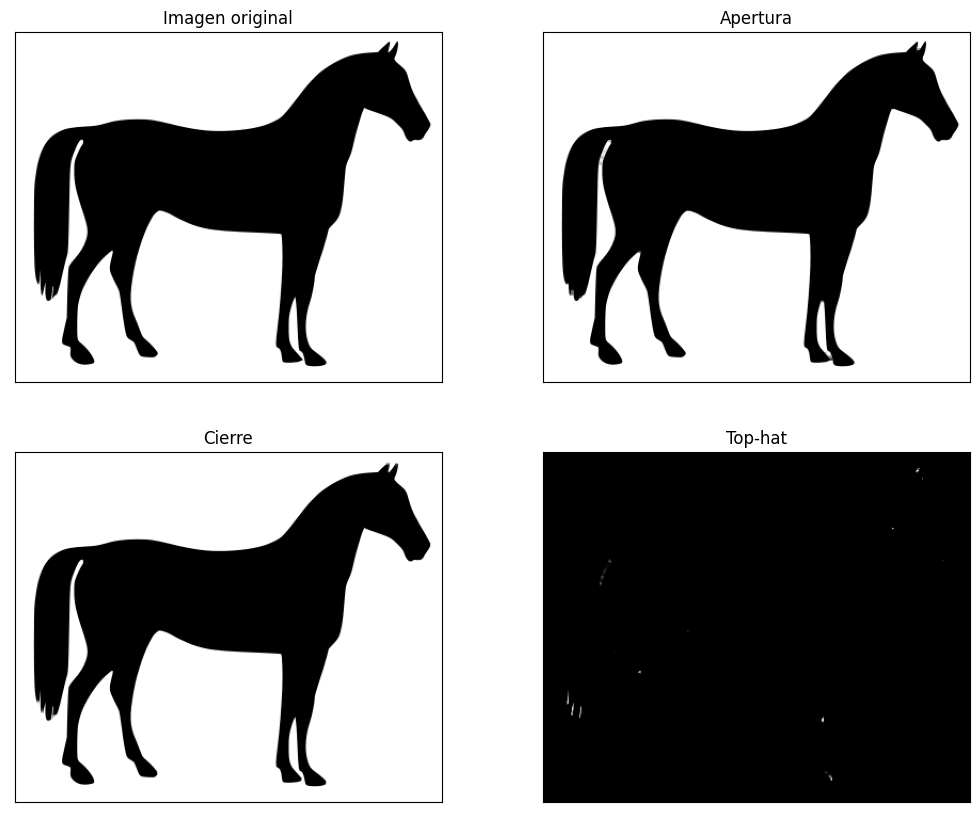

In [33]:
_, axs = plt.subplots(2, 2, figsize=(12.5, 10))

axs[0, 0].set_title('Imagen original')
axs[0, 0].imshow(cafe)

axs[0, 1].set_title('Apertura')
axs[0, 1].imshow(apertura(cafe),"gray")

axs[1, 0].set_title('Cierre')
axs[1, 0].imshow(cierre(cierre(cafe)),"gray")

axs[1, 1].set_title('Top-hat')
axs[1, 1].imshow(top_hat(cafe),"gray")

for r in range(2):
    for c in range(2):
        axs[r, c].set_xticks([])
        axs[r, c].set_yticks([])

plt.show()